Analysis borrowed from lifelines documentation
- https://lifelines.readthedocs.io/en/latest/Survival%20analysis%20with%20lifelines.html
- https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Piecewise%20Exponential%20Models%20and%20Creating%20Custom%20Models.html

In [15]:
from lifelines.plotting import plot_lifetimes
import numpy as np
from numpy.random import uniform, exponential

In [16]:
from lifelines import WeibullFitter, ExponentialFitter

In [17]:
from lifelines import NelsonAalenFitter

In [18]:
from lifelines import KaplanMeierFitter

In [19]:
from lifelines.datasets import load_waltons
data = load_waltons()
data.head()

,T,E,group
0,6.0,1,miR-137
1,13.0,1,miR-137
2,13.0,1,miR-137
3,13.0,1,miR-137
4,19.0,1,miR-137


<AxesSubplot:xlabel='timeline'>

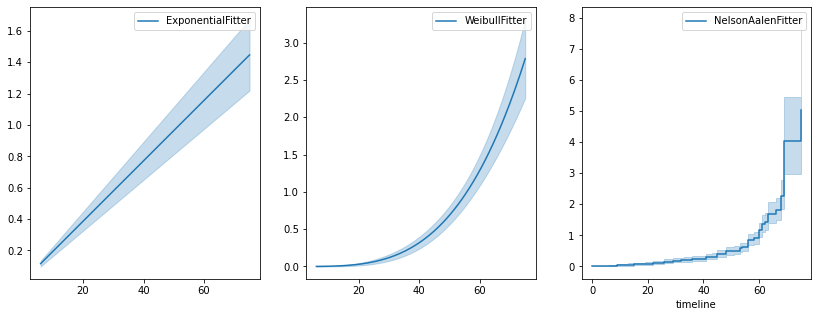

In [20]:
import pylab
fig, axes = pylab.subplots(1, 3, figsize=(14, 5))

T = data['T']
E = data['E']

exf = ExponentialFitter().fit(T, E, label='ExponentialFitter')
wbf = WeibullFitter().fit(T, E, label='WeibullFitter')
naf = NelsonAalenFitter().fit(T, E, label='NelsonAalenFitter')

exf.plot_cumulative_hazard(ax=axes[0])
wbf.plot_cumulative_hazard(ax=axes[1])
naf.plot_cumulative_hazard(ax=axes[2])

<AxesSubplot:xlabel='timeline'>

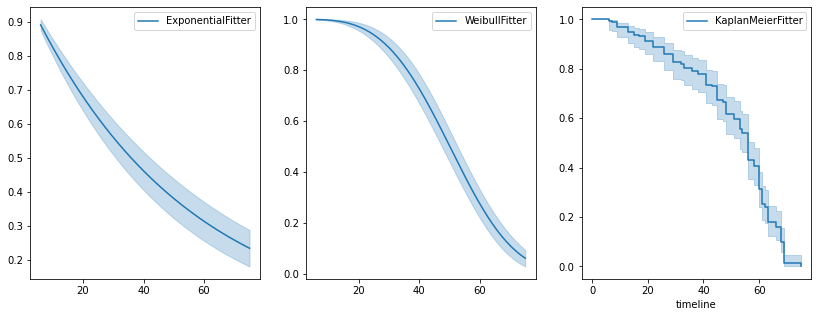

In [23]:
fig, axes = pylab.subplots(1, 3, figsize=(14, 5))
kmf = KaplanMeierFitter().fit(T, E, label='KaplanMeierFitter')
exf.plot_survival_function(ax=axes[0])
wbf.plot_survival_function(ax=axes[1])
kmf.plot_survival_function(ax=axes[2])

Text(0.5, 1.0, 'Survival function of Weibull model; estimated parameters')

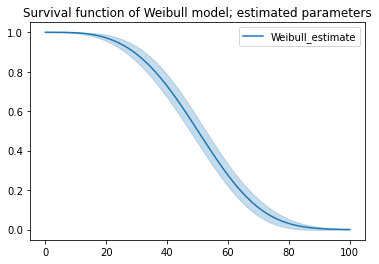

In [24]:
timeline = np.linspace(0, 100, 200)

# directly compute the survival function, these return a pandas Series
wbf = WeibullFitter().fit(T, E)
wbf.survival_function_at_times(timeline)
wbf.hazard_at_times(timeline)
wbf.cumulative_hazard_at_times(timeline)

# use the `timeline` kwarg in `fit`
# by default, all functions and properties will use
# these values provided
wbf = WeibullFitter().fit(T, E, timeline=timeline)

ax = wbf.plot_survival_function()
ax.set_title("Survival function of Weibull model; estimated parameters")

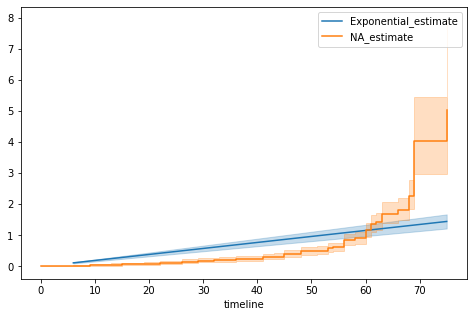

In [30]:
ax = epf.plot(figsize=(8,5))

naf = NelsonAalenFitter().fit(T, E)
ax = naf.plot(ax=ax)
plt.legend()

<lifelines.PiecewiseExponentialFitter:"PiecewiseExponential_estimate", fitted with 163 total observations, 7 right-censored observations>
   number of observations = 163
number of events observed = 156
           log-likelihood = -647.118
               hypothesis = lambda_0_ != 1, lambda_1_ != 1, lambda_2_ != 1

---
             coef   se(coef)   coef lower 95%   coef upper 95%     z       p   -log2(p)
lambda_0_ 163.105     27.183          109.827          216.383 5.963 <0.0005     28.593
lambda_1_  31.362      4.042           23.440           39.283 7.512 <0.0005     43.968
lambda_2_   4.685      0.624            3.462            5.909 5.903 <0.0005     28.059
---
AIC = 1300.235

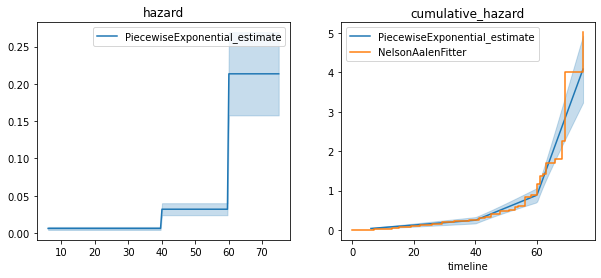

In [25]:
from lifelines import PiecewiseExponentialFitter

# looking at the above plot, I think there may be breaks at t=40 and t=60.
pf = PiecewiseExponentialFitter(breakpoints=[40, 60]).fit(T, E)

fig, axs = pylab.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax = pf.plot(ax=axs[1])
pf.plot_hazard(ax=axs[0])

ax = naf.plot(ax=ax, ci_show=False)
axs[0].set_title("hazard"); axs[1].set_title("cumulative_hazard")

pf.print_summary(3)

See here for more examples of parametric survival models! https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Piecewise%20Exponential%20Models%20and%20Creating%20Custom%20Models.html